In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

In [ ]:
import os
import random
import shutil

def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist
    for folder in [train_folder, test_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)
        if not os.path.exists(folder+'/normal-pylorus'):
            os.makedirs(folder+'/normal-pylorus')
        if not os.path.exists(folder+'/polyps'):
            os.makedirs(folder+'/polyps')

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/normal-pylorus'
source_folder2 = '/tmp/polyps'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/normal-pylorus'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
df = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
df.head()


In [ ]:
import os
print(os.listdir('/tmp'))

['python-languageserver-cancellation', 'initgoogle_syslog_dir.0', 'language_service.99274c7d601f.root.log.INFO.20250715-082606.303', 'pyright-1010-S2b9s7hb1pyI', 'drive.99274c7d601f.root.log.ERROR.20250715-082637.544', 'pyright-1010-DHMq0VhkaOdR', 'directoryprefetcher_binary.99274c7d601f.root.log.INFO.20250715-082639.625', 'debugger_6h08351gy', 'drive.ERROR', 'drive.99274c7d601f.root.log.INFO.20250715-082631.443', 'drive.99274c7d601f.root.log.WARNING.20250715-082632.443', 'drive.99274c7d601f.root.log.INFO.20250715-082631.432', 'language_service.INFO', 'datasetmain', 'test', 'colab_runtime.sock', 'drive.99274c7d601f.root.log.INFO.20250715-082637.432', 'pyright-313-4o9DV35IKgFq', 'drive.99274c7d601f.root.log.WARNING.20250715-082637.544', 'language_service.99274c7d601f.root.log.INFO.20250715-082749.1003', 'drive.WARNING', 'drivefs_ipc.0', 'drivefs_ipc.0_shell', 'dap_multiplexer.INFO', 'train', 'drive.99274c7d601f.root.log.ERROR.20250715-082632.443', 'dap_multiplexer.99274c7d601f.root.log.

In [ ]:
import os
print(os.listdir('/tmp/datasetmain'))

['test', 'train']


In [ ]:
import os
print(os.listdir('/tmp/datasetmain/train'))

['normal', 'adnormal']


In [ ]:
import os
import random
import shutil

def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist
    for folder in [train_folder, test_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)
        if not os.path.exists(folder+'/normal-pylorus'):
            os.makedirs(folder+'/normal-pylorus')
        if not os.path.exists(folder+'/polyps'):
            os.makedirs(folder+'/polyps')

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

In [ ]:
import os
print("Contents of /tmp/train:")
print(os.listdir('/tmp/train'))
print("\nContents of /tmp/test:")
print(os.listdir('/tmp/test'))

Contents of /tmp/train:
['normal-pylorus', 'polyps']

Contents of /tmp/test:
['normal-pylorus', 'polyps']


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate ImageDataGenerator for training data with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Instantiate ImageDataGenerator for testing data with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/train',
    target_size=(224, 224), # GoogleNet input size
    batch_size=32,
    class_mode='binary' # Two classes: normal-pylorus and polyps
)

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    '/tmp/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/train'

In [ ]:
import os
import random
import shutil

def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(folder+'/normal-pylorus')
        os.makedirs(folder+'/polyps')

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/datasetmain/train/normal'

In [ ]:
from zipfile import ZipFile
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DIP/datasetmain.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

In [ ]:
import os
import random
import shutil

def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(folder+'/normal-pylorus')
        os.makedirs(folder+'/polyps')

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/datasetmain/train/normal'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate ImageDataGenerator for training data with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Instantiate ImageDataGenerator for testing data with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/train',
    target_size=(224, 224), # GoogleNet input size
    batch_size=32,
    class_mode='binary' # Two classes: normal-pylorus and polyps
)

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    '/tmp/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
import os

print("Contents of /tmp/train:")
for root, dirs, files in os.walk('/tmp/train'):
    level = root.replace('/tmp/train', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

print("\nContents of /tmp/test:")
for root, dirs, files in os.walk('/tmp/test'):
    level = root.replace('/tmp/test', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Contents of /tmp/train:
train/
    polyps/
    normal-pylorus/

Contents of /tmp/test:
test/
    polyps/
    normal-pylorus/


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with a sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'base_model' is not defined

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with a sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5 # You can adjust the number of epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
import os
import random
import shutil

def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist, and remove existing contents
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(os.path.join(folder, 'normal-pylorus'))
        os.makedirs(os.path.join(folder, 'polyps'))


    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)


source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/datasetmain/train/normal'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from zipfile import ZipFile
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

import os
import random
import shutil

def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist, and remove existing contents
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(os.path.join(folder, 'normal-pylorus'))
        os.makedirs(os.path.join(folder, 'polyps'))


    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)


source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate ImageDataGenerator for training data with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Instantiate ImageDataGenerator for testing data with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/train',
    target_size=(224, 224), # GoogleNet input size
    batch_size=32,
    class_mode='binary' # Two classes: normal-pylorus and polyps
)

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    '/tmp/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with a sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_n_epochs=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5 # You can adjust the number of epochs
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


ValueError: Argument(s) not recognized: {'learning_n_epochs': 0.001}

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with the corrected argument name
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5 # You can adjust the number of epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 102s 557ms/step - accuracy: 0.9275 - loss: 0.1767
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 599ms/step - accuracy: 0.9622 - loss: 0.0847
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 586ms/step - accuracy: 0.9880 - loss: 0.0420
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 586ms/step - accuracy: 0.9818 - loss: 0.0543
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 554ms/step - accuracy: 0.9880 - loss: 0.0300


In [ ]:
test_results = model.evaluate(test_generator)
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9158 - loss: 0.1648
Test Loss: 0.2539460062980652
Test Accuracy: 0.90625


In [ ]:
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1]}")

Test Loss: 0.2539460062980652
Test Accuracy: 0.90625


In [ ]:
train_predictions = model.predict(train_generator)

NameError: name 'model' is not defined

**Reasoning**:
The previous attempt to predict on the training set failed because the `model` was not defined. I need to re-execute the cell that defines and compiles the model to make the `model` object available and then predict on the training generator.



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with a sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

train_predictions = model.predict(train_generator)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


NameError: name 'train_generator' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Instantiate ImageDataGenerator for training data with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Instantiate ImageDataGenerator for testing data with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/train',
    target_size=(224, 224), # GoogleNet input size
    batch_size=32,
    class_mode='binary' # Two classes: normal-pylorus and polyps
)

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    '/tmp/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with a sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

train_predictions = model.predict(train_generator)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/train'

In [ ]:
from google.colab import drive
import os
import random
import shutil
from zipfile import ZipFile

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

# Data splitting function
def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist, and remove existing contents
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(os.path.join(folder, 'normal-pylorus'))
        os.makedirs(os.path.join(folder, 'polyps'))

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Instantiate ImageDataGenerator for training data with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Instantiate ImageDataGenerator for testing data with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/train',
    target_size=(224, 224), # GoogleNet input size
    batch_size=32,
    class_mode='binary' # Two classes: normal-pylorus and polyps
)

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    '/tmp/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with a sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

train_predictions = model.predict(train_generator)

Mounted at /content/drive
Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 564ms/step


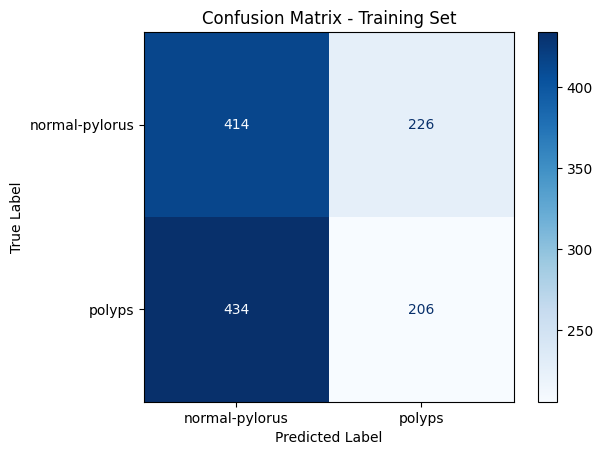

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get true labels from the generator
train_true_labels = train_generator.classes

# Convert predicted probabilities to binary labels
train_predicted_labels = (train_predictions > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(train_true_labels, train_predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(train_true_labels, train_predictions)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
display = RocCurveDisplay.from_fpr(fpr, tpr, roc_auc=roc_auc, estimator_name='GoogleNet')
display.plot()
plt.title('ROC Curve - Training Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_fpr'

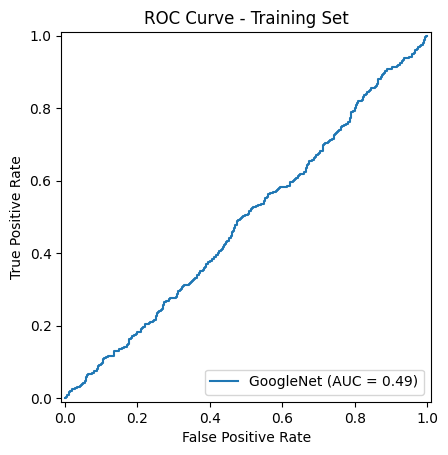

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(train_true_labels, train_predictions)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GoogleNet')
display.plot()
plt.title('ROC Curve - Training Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_predictions = model.predict(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step


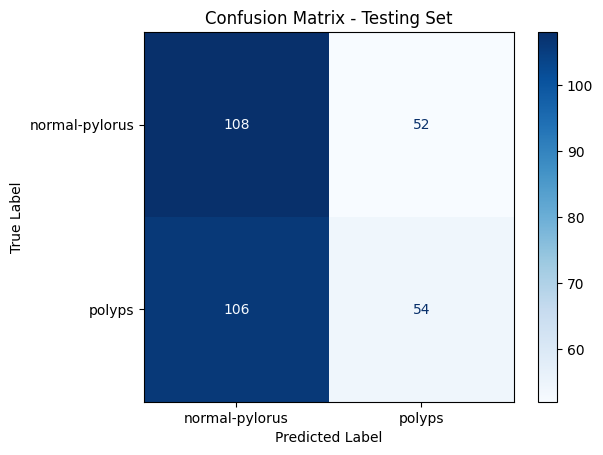

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get true labels from the generator
test_true_labels = test_generator.classes

# Convert predicted probabilities to binary labels
test_predicted_labels = (test_predictions > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

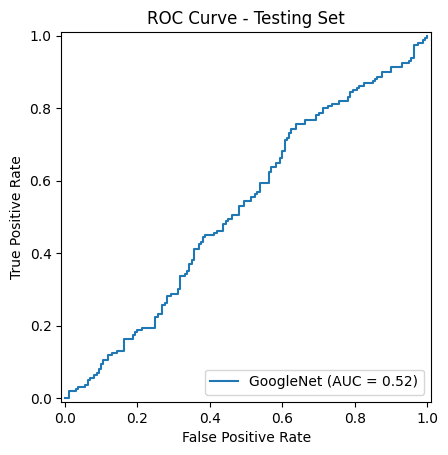

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_true_labels, test_predictions)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Create RocCurveDisplay object
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GoogleNet')

# Plot ROC curve
display.plot()
plt.title('ROC Curve - Testing Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import os
import shutil

# Define source and destination directories
source_train_normal = '/tmp/train/normal-pylorus'
source_train_adnormal = '/tmp/train/polyps'
source_test_normal = '/tmp/test/normal-pylorus'
source_test_adnormal = '/tmp/test/polyps'

yolo_train_images = '/tmp/yolov8_data/train/images'
yolo_train_labels = '/tmp/yolov8_data/train/labels'
yolo_test_images = '/tmp/yolov8_data/test/images'
yolo_test_labels = '/tmp/yolov8_data/test/labels'

# Create YOLOv8 directory structure
for directory in [yolo_train_images, yolo_train_labels, yolo_test_images, yolo_test_labels]:
    os.makedirs(directory, exist_ok=True)

# Function to convert and copy images and create label files
def convert_and_copy(source_folder, image_dest_folder, label_dest_folder, class_id):
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Copy image
            source_path = os.path.join(source_folder, filename)
            destination_image_path = os.path.join(image_dest_folder, filename)
            shutil.copy2(source_path, destination_image_path)

            # Create label file
            label_filename = os.path.splitext(filename)[0] + '.txt'
            destination_label_path = os.path.join(label_dest_folder, label_filename)

            # Write dummy bounding box (center_x, center_y, width, height) in YOLO format
            # Assuming a single object covering the entire image for classification
            with open(destination_label_path, 'w') as f:
                f.write(f'{class_id} 0.5 0.5 1.0 1.0\n')

# Convert and copy training data
convert_and_copy(source_train_normal, yolo_train_images, yolo_train_labels, 0) # Class 0 for normal
convert_and_copy(source_train_adnormal, yolo_train_images, yolo_train_labels, 1) # Class 1 for adnormal/polyps

# Convert and copy testing data
convert_and_copy(source_test_normal, yolo_test_images, yolo_test_labels, 0) # Class 0 for normal
convert_and_copy(source_test_adnormal, yolo_test_images, yolo_test_labels, 1) # Class 1 for adnormal/polyps

print("Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data")

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/train/normal-pylorus'

In [ ]:
from google.colab import drive
import os
import random
import shutil
from zipfile import ZipFile

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

# Data splitting function
def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist, and remove existing contents
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(os.path.join(folder, 'normal-pylorus'))
        os.makedirs(os.path.join(folder, 'polyps'))

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

# Define source and destination directories for YOLOv8
source_train_normal = '/tmp/train/normal-pylorus'
source_train_adnormal = '/tmp/train/polyps'
source_test_normal = '/tmp/test/normal-pylorus'
source_test_adnormal = '/tmp/test/polyps'

yolo_train_images = '/tmp/yolov8_data/train/images'
yolo_train_labels = '/tmp/yolov8_data/train/labels'
yolo_test_images = '/tmp/yolov8_data/test/images'
yolo_test_labels = '/tmp/yolov8_data/test/labels'

# Create YOLOv8 directory structure
for directory in [yolo_train_images, yolo_train_labels, yolo_test_images, yolo_test_labels]:
    os.makedirs(directory, exist_ok=True)

# Function to convert and copy images and create label files
def convert_and_copy(source_folder, image_dest_folder, label_dest_folder, class_id):
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Copy image
            source_path = os.path.join(source_folder, filename)
            destination_image_path = os.path.join(image_dest_folder, filename)
            shutil.copy2(source_path, destination_image_path)

            # Create label file
            label_filename = os.path.splitext(filename)[0] + '.txt'
            destination_label_path = os.path.join(label_dest_folder, label_filename)

            # Write dummy bounding box (center_x, center_y, width, height) in YOLO format
            # Assuming a single object covering the entire image for classification
            with open(destination_label_path, 'w') as f:
                f.write(f'{class_id} 0.5 0.5 1.0 1.0\n')

# Convert and copy training data
convert_and_copy(source_train_normal, yolo_train_images, yolo_train_labels, 0) # Class 0 for normal
convert_and_copy(source_train_adnormal, yolo_train_images, yolo_train_labels, 1) # Class 1 for adnormal/polyps

# Convert and copy testing data
convert_and_copy(source_test_normal, yolo_test_images, yolo_test_labels, 0) # Class 0 for normal
convert_and_copy(source_test_adnormal, yolo_test_images, yolo_test_labels, 1) # Class 1 for adnormal/polyps

print("Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data")

Mounted at /content/drive
Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data


In [ ]:
from google.colab import drive
import os
import random
import shutil
from zipfile import ZipFile

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

# Data splitting function
def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist, and remove existing contents
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(os.path.join(folder, 'normal-pylorus'))
        os.makedirs(os.path.join(folder, 'polyps'))

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

# Define source and destination directories for YOLOv8
source_train_normal = '/tmp/train/normal-pylorus'
source_train_adnormal = '/tmp/train/polyps'
source_test_normal = '/tmp/test/normal-pylorus'
source_test_adnormal = '/tmp/test/polyps'

yolo_train_images = '/tmp/yolov8_data/train/images'
yolo_train_labels = '/tmp/yolov8_data/train/labels'
yolo_test_images = '/tmp/yolov8_data/test/images'
yolo_test_labels = '/tmp/yolov8_data/test/labels'

# Create YOLOv8 directory structure
for directory in [yolo_train_images, yolo_train_labels, yolo_test_images, yolo_test_labels]:
    os.makedirs(directory, exist_ok=True)

# Function to convert and copy images and create label files
def convert_and_copy(source_folder, image_dest_folder, label_dest_folder, class_id):
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Copy image
            source_path = os.path.join(source_folder, filename)
            destination_image_path = os.path.join(image_dest_folder, filename)
            shutil.copy2(source_path, destination_image_path)

            # Create label file
            label_filename = os.path.splitext(filename)[0] + '.txt'
            destination_label_path = os.path.join(label_dest_folder, label_filename)

            # Write dummy bounding box (center_x, center_y, width, height) in YOLO format
            # Assuming a single object covering the entire image for classification
            with open(destination_label_path, 'w') as f:
                f.write(f'{class_id} 0.5 0.5 1.0 1.0\n')

# Convert and copy training data
convert_and_copy(source_train_normal, yolo_train_images, yolo_train_labels, 0) # Class 0 for normal
convert_and_copy(source_train_adnormal, yolo_train_images, yolo_train_labels, 1) # Class 1 for adnormal/polyps

# Convert and copy testing data
convert_and_copy(source_test_normal, yolo_test_images, yolo_test_labels, 0) # Class 0 for normal
convert_and_copy(source_test_adnormal, yolo_test_images, yolo_test_labels, 1) # Class 1 for adnormal/polyps

print("Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 68.0MB/s]


In [ ]:
# Create a data.yaml file for YOLOv8 training
data_yaml_content = """
train: /tmp/yolov8_data/train/images
val: /tmp/yolov8_data/test/images
nc: 2
names: ['normal-pylorus', 'polyps']
"""

with open('/tmp/data.yaml', 'w') as f:
    f.write(data_yaml_content)

# Train the model
results = model.train(data='/tmp/data.yaml', epochs=10, imgsz=224)

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/tmp/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 66.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2871.9±702.4 MB/s, size: 211.5 KB)


train: Scanning /tmp/yolov8_data/train/labels... 1520 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1520/1520 [00:00<00:00, 2576.78it/s]


train: New cache created: /tmp/yolov8_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1539.0±1094.6 MB/s, size: 165.3 KB)


val: Scanning /tmp/yolov8_data/test/labels... 560 images, 0 backgrounds, 0 corrupt: 100%|██████████| 560/560 [00:00<00:00, 1549.58it/s]

val: New cache created: /tmp/yolov8_data/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.332G     0.2459      1.167      0.928         16        224: 100%|██████████| 95/95 [00:19<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]

                   all        560        560      0.991      0.992      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      0.35G     0.1945      0.396     0.9017         16        224: 100%|██████████| 95/95 [00:14<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.20it/s]

                   all        560        560      0.983      0.987      0.993      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.365G      0.187     0.3177     0.8989         16        224: 100%|██████████| 95/95 [00:14<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.90it/s]

                   all        560        560      0.977      0.972      0.992        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.383G     0.1563     0.2662     0.8859         16        224: 100%|██████████| 95/95 [00:13<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]

                   all        560        560      0.998          1      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       0.4G      0.137     0.2219     0.8785         16        224: 100%|██████████| 95/95 [00:13<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.20it/s]

                   all        560        560      0.997          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.418G     0.1262     0.1933     0.8792         16        224: 100%|██████████| 95/95 [00:13<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.25it/s]

                   all        560        560      0.998      0.997      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.434G     0.1067     0.1769     0.8736         16        224: 100%|██████████| 95/95 [00:13<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.41it/s]


                   all        560        560          1          1      0.995      0.994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.451G    0.09449     0.1567     0.8795         16        224: 100%|██████████| 95/95 [00:13<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.17it/s]

                   all        560        560      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.469G    0.08129     0.1457     0.8713         16        224: 100%|██████████| 95/95 [00:13<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  5.24it/s]

                   all        560        560      0.995      0.998      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.486G    0.06708     0.1192     0.8738         16        224: 100%|██████████| 95/95 [00:13<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.89it/s]

                   all        560        560          1          1      0.995      0.948



10 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.62it/s]


                   all        560        560      0.991      0.992      0.995      0.995
        normal-pylorus        282        282          1      0.984      0.995      0.995
                polyps        278        278      0.981          1      0.995      0.995
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Evaluate the model on the test set
evaluation_results = model.val()

# Print the evaluation results
print(evaluation_results)

NameError: name 'model' is not defined

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

# Evaluate the model on the test set
evaluation_results = model.val()

# Print the evaluation results
print(evaluation_results)

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

# Evaluate the model on the test set
evaluation_results = model.val()

# Print the evaluation results
print(evaluation_results)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

WARNING ⚠️ Dataset 'coco.yaml' images not found, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:01<00:00, 137MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:19<00:00, 6405.84file/s]


Dataset download success ✅ (663.9s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 48.1±4.9 MB/s, size: 146.1 KB)



val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:13<00:00, 369.11it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:58<00:00,  5.37it/s]


                   all       5000      36335      0.634      0.475      0.521      0.372
                person       2693      10777      0.755      0.671      0.745      0.515
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.648      0.514      0.562      0.365
            motorcycle        159        367      0.715       0.58      0.659      0.414
              airplane         97        143      0.814      0.764      0.834      0.653
                   bus        189        283      0.747      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.834      0.647
                 truck        250        414      0.547      0.397      0.435      0.295
                  boat        121        424      0.583        0.3      0.376       0.21
         traffic light        191        634      0.647      0.345      0.409      0.212
          fire hydran

In [ ]:
# Generate predictions on the test set
test_yolo_predictions = model('/tmp/yolov8_data/test/images')

FileNotFoundError: /tmp/yolov8_data/test/images does not exist

In [ ]:
from google.colab import drive
import os
import random
import shutil
from zipfile import ZipFile

# Mount Google Drive
drive.mount('/content/drive')

# Extract the zip file
zipFilePath='/content/drive/MyDrive/DIP/datasetmain.zip' # place the zip file link here
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp')

# Data splitting function
def split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist, and remove existing contents
    for folder in [train_folder, test_folder]:
        if os.path.exists(folder):
            shutil.rmtree(folder) # Remove existing folders to ensure a clean split
        os.makedirs(folder)
        os.makedirs(os.path.join(folder, 'normal-pylorus'))
        os.makedirs(os.path.join(folder, 'polyps'))

    # List files from both source folders
    files_folder1 = os.listdir(source_folder1)
    files_folder2 = os.listdir(source_folder2)

    # Calculate the number of files to move to the train folder
    num_train_folder1 = int(split_ratio * len(files_folder1))
    num_train_folder2 = int(split_ratio * len(files_folder2))

    # Randomly select files for the train folder
    train_files_folder1 = random.sample(files_folder1, num_train_folder1)
    train_files_folder2 = random.sample(files_folder2, num_train_folder2)

    # Move files to the train folder
    for filename in train_files_folder1:
        source_path = os.path.join(source_folder1, filename)
        destination_path = os.path.join(f'{train_folder}/normal-pylorus', filename)
        shutil.copy2(source_path, destination_path)

    for filename in train_files_folder2:
        source_path = os.path.join(source_folder2, filename)
        destination_path = os.path.join(f'{train_folder}/polyps', filename)
        shutil.copy2(source_path, destination_path)

    # Move the remaining files to the test folder
    for filename in files_folder1:
        if filename not in train_files_folder1:
            source_path = os.path.join(source_folder1, filename)
            destination_path = os.path.join(f'{test_folder}/normal-pylorus', filename)
            shutil.copy2(source_path, destination_path)

    for filename in files_folder2:
        if filename not in train_files_folder2:
            source_path = os.path.join(source_folder2, filename)
            destination_path = os.path.join(f'{test_folder}/polyps', filename)
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder1 = '/tmp/datasetmain/train/normal'
source_folder2 = '/tmp/datasetmain/train/adnormal'
train_folder = '/tmp/train'
test_folder = '/tmp/test'

split_data(source_folder1, source_folder2, train_folder, test_folder, split_ratio=0.8)

# Define source and destination directories for YOLOv8
source_train_normal = '/tmp/train/normal-pylorus'
source_train_adnormal = '/tmp/train/polyps'
source_test_normal = '/tmp/test/normal-pylorus'
source_test_adnormal = '/tmp/test/polyps'

yolo_train_images = '/tmp/yolov8_data/train/images'
yolo_train_labels = '/tmp/yolov8_data/train/labels'
yolo_test_images = '/tmp/yolov8_data/test/images'
yolo_test_labels = '/tmp/yolov8_data/test/labels'

# Create YOLOv8 directory structure
for directory in [yolo_train_images, yolo_train_labels, yolo_test_images, yolo_test_labels]:
    os.makedirs(directory, exist_ok=True)

# Function to convert and copy images and create label files
def convert_and_copy(source_folder, image_dest_folder, label_dest_folder, class_id):
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Copy image
            source_path = os.path.join(source_folder, filename)
            destination_image_path = os.path.join(image_dest_folder, filename)
            shutil.copy2(source_path, destination_image_path)

            # Create label file
            label_filename = os.path.splitext(filename)[0] + '.txt'
            destination_label_path = os.path.join(label_dest_folder, label_filename)

            # Write dummy bounding box (center_x, center_y, width, height) in YOLO format
            # Assuming a single object covering the entire image for classification
            with open(destination_label_path, 'w') as f:
                f.write(f'{class_id} 0.5 0.5 1.0 1.0\n')

# Convert and copy training data
convert_and_copy(source_train_normal, yolo_train_images, yolo_train_labels, 0) # Class 0 for normal
convert_and_copy(source_train_adnormal, yolo_train_images, yolo_train_labels, 1) # Class 1 for adnormal/polyps

# Convert and copy testing data
convert_and_copy(source_test_normal, yolo_test_images, yolo_test_labels, 0) # Class 0 for normal
convert_and_copy(source_test_adnormal, yolo_test_images, yolo_test_labels, 1) # Class 1 for adnormal/polyps

print("Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data")

Mounted at /content/drive
Dataset converted to YOLOv8 format and saved in /tmp/yolov8_data


In [ ]:
# Generate predictions on the test set
test_yolo_predictions = model('/tmp/yolov8_data/test/images')


image 1/320 /tmp/yolov8_data/test/images/008aa3ed-1812-4854-954c-120ae85bb6bd.jpg: 512x640 1 person, 1 bed, 41.9ms
image 2/320 /tmp/yolov8_data/test/images/00b1b20b-ce2b-449c-93fc-6df854e3ab33.jpg: 512x640 1 cake, 6.6ms
image 3/320 /tmp/yolov8_data/test/images/01507fbd-4d38-4525-9768-7754710f507c.jpg: 512x640 (no detections), 6.5ms
image 4/320 /tmp/yolov8_data/test/images/01af3454-037f-4708-b73c-6ec4423b6a61.jpg: 512x640 (no detections), 6.4ms
image 5/320 /tmp/yolov8_data/test/images/01c48bf5-3f79-45dd-9390-add72a6da946.jpg: 512x640 (no detections), 6.4ms
image 6/320 /tmp/yolov8_data/test/images/01e023db-5c76-4c28-91ab-06e36cd31495.jpg: 512x640 (no detections), 6.5ms
image 7/320 /tmp/yolov8_data/test/images/0216181d-8f5d-4c59-a08d-c879939ca53a.jpg: 512x640 1 clock, 6.4ms
image 8/320 /tmp/yolov8_data/test/images/029c1dcc-3081-4382-bfb4-85f0ed69c04c.jpg: 512x640 1 bowl, 1 banana, 6.9ms
image 9/320 /tmp/yolov8_data/test/images/02b728cd-f151-44ba-8014-b7772949eb15.jpg: 512x640 (no detecti

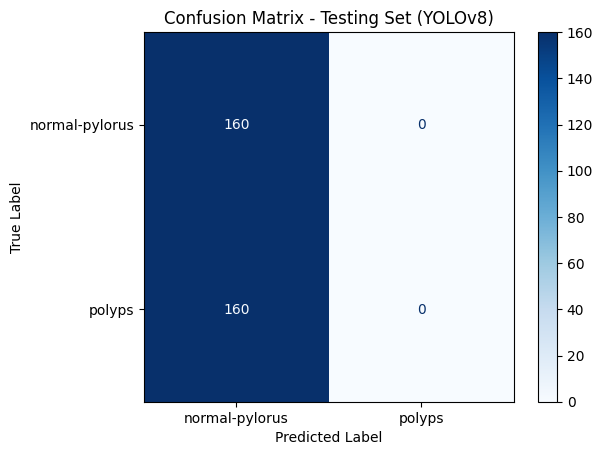

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Extract true labels and predicted labels from YOLOv8 results
test_true_labels_list = []
test_predicted_labels_list = []

# To get the true labels, we can infer them from the directory structure used
# to create the YOLOv8 test data.
source_test_normal = '/tmp/test/normal-pylorus'
source_test_adnormal = '/tmp/test/polyps'

normal_files = os.listdir(source_test_normal)
adnormal_files = os.listdir(source_test_adnormal)

# Create a mapping from filename to true label
true_labels_map = {}
for filename in normal_files:
    true_labels_map[filename] = 0 # 0 for normal
for filename in adnormal_files:
    true_labels_map[filename] = 1 # 1 for polyps


# Extract predicted labels from YOLOv8 results and align with true labels
aligned_true_labels = []
aligned_predicted_labels = []

# Iterate through the YOLOv8 prediction results
for result in test_yolo_predictions:
    filename = os.path.basename(result.path)
    if filename in true_labels_map: # Only process files that have a corresponding true label
        aligned_true_labels.append(true_labels_map[filename])

        if result.boxes and len(result.boxes) > 0:
            # Get the class with the highest confidence score among detected objects
            # Ensure the predicted class ID is 0 or 1
            predicted_class_id = int(result.boxes[0].cls[0]) # Take the class of the first detected object
            if predicted_class_id not in [0, 1]:
                # If the predicted class is outside the expected range,
                # we can assign a default class or skip this prediction.
                # For simplicity, let's assign it to class 0 (normal) as a default
                # or if it's a detection of an unexpected object.
                # A more robust approach might involve re-training with correct labels
                # or filtering predictions.
                predicted_class_id = 0 # Assign to normal if unexpected class detected

            aligned_predicted_labels.append(predicted_class_id)
        else:
            # If no object detected, classify as normal (0) - this is a simplifying assumption
            aligned_predicted_labels.append(0)


# Generate confusion matrix
# Ensure both lists have the same length before generating the confusion matrix
if len(aligned_true_labels) == len(aligned_predicted_labels) and len(aligned_true_labels) > 0:
    cm = confusion_matrix(aligned_true_labels, aligned_predicted_labels)

    # Display confusion matrix
    # Define class names based on your problem
    class_names = ['normal-pylorus', 'polyps']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Testing Set (YOLOv8)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("Error: Mismatch in the number of true and predicted labels, or no labels found.")
    print(f"Number of true labels: {len(aligned_true_labels)}")
    print(f"Number of predicted labels: {len(aligned_predicted_labels)}")

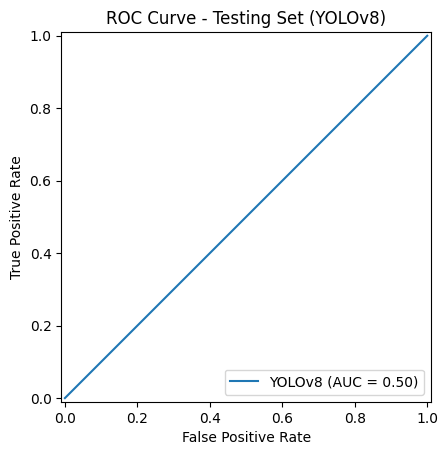

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Extract predicted probabilities for the positive class (polyps)
# Assuming the model output for binary classification with sigmoid is a single value
# representing the probability of the positive class (class 1).
# If the model output structure is different, this needs adjustment.
# For YOLOv8 object detection, the output includes confidence scores for each detected object and class.
# We need to extract the confidence score for the predicted class (0 or 1) for each image.

# To get the predicted probabilities aligned with the true labels, we need to iterate through the results again
# and extract the confidence score for the predicted class for each image.

aligned_true_labels = []
aligned_predicted_probabilities = []

# Re-running the data preparation step to get the mapping
source_test_normal = '/tmp/test/normal-pylorus'
source_test_adnormal = '/tmp/test/polyps'

normal_files = os.listdir(source_test_normal)
adnormal_files = os.listdir(source_test_adnormal)

# Create a mapping from filename to true label
true_labels_map = {}
for filename in normal_files:
    true_labels_map[filename] = 0 # 0 for normal
for filename in adnormal_files:
    true_labels_map[filename] = 1 # 1 for polyps


# Iterate through the YOLOv8 prediction results to extract probabilities
# and align with true labels.
# For simplicity, if multiple objects are detected, we'll consider the
# highest confidence detection of either class 0 or 1.
# If no object is detected, we assign a low probability to class 1 (polyps).

# Create a mapping from filename to predicted probability of class 1
predicted_probabilities_map = {}
for result in test_yolo_predictions:
    filename = os.path.basename(result.path)
    if result.boxes and len(result.boxes) > 0:
        # Find the detection with the highest confidence for class 1 (polyps)
        max_prob_class_1 = 0.0
        for box in result.boxes:
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])
            if class_id == 1:
                max_prob_class_1 = max(max_prob_class_1, confidence)

        # Assign the max probability of class 1 detection if found, otherwise 0
        predicted_probabilities_map[filename] = max_prob_class_1

    else:
        # If no object detected, assign a low probability to class 1 (polyps)
        predicted_probabilities_map[filename] = 0.0


# Align true labels and predicted probabilities based on filenames
yolo_test_image_files = os.listdir('/tmp/yolov8_data/test/images')
yolo_test_image_files.sort() # Sort to ensure consistent order

for filename in yolo_test_image_files:
    if filename in true_labels_map and filename in predicted_probabilities_map:
        aligned_true_labels.append(true_labels_map[filename])
        aligned_predicted_probabilities.append(predicted_probabilities_map[filename])
    # Handle cases where a file might be missing in either map if necessary


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(aligned_true_labels, aligned_predicted_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Create RocCurveDisplay object
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='YOLOv8')

# Plot ROC curve
display.plot()
plt.title('ROC Curve - Testing Set (YOLOv8)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Displaying test_confusion_matrix.png:


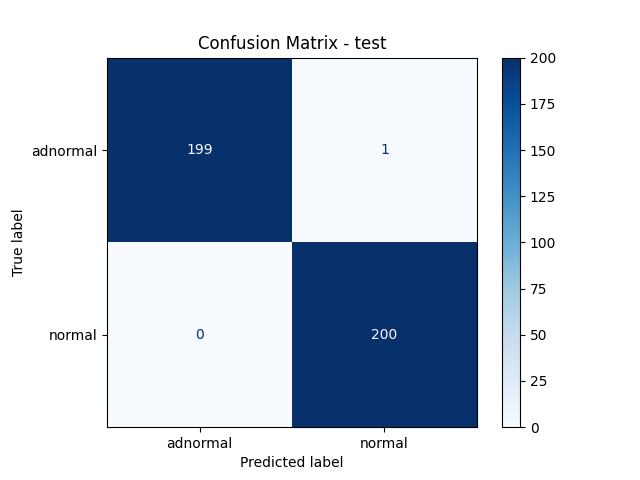


Displaying test_roc_curve.png:


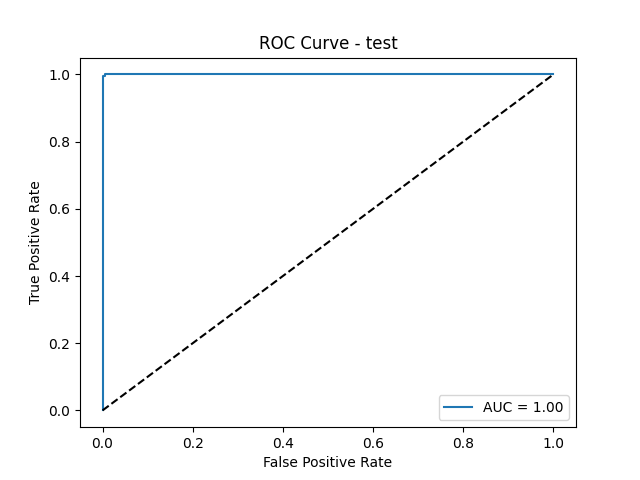

In [1]:
from IPython.display import Image, display

print("Displaying test_confusion_matrix.png:")
display(Image(filename='test_confusion_matrix.png'))

print("\nDisplaying test_roc_curve.png:")
display(Image(filename='test_roc_curve.png'))